In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('./results/manual_data1/calibration_image_data.csv', sep=',',decimal='.')
df.head()

,img_num,target_aruco,img_name,carriage_x_dist,carriage_y_dist,carriage_x_undist,carriage_y_undist,carriage_x_dist_warp,carriage_y_dist_warp,carriage_x_undist_warp,...,target_x_undist_warp,target_y_undist_warp,angle_dist,angle_undist,angle_dist_warp,angle_undist_warp,aruco_flipper_76_x,aruco_flipper_76_y,aruco_flipper_77_x,aruco_flipper_77_y
0,1,13,img_1,544.5,992.5,553.0,977.0,400.31912,562.67110,404.95688,...,1075.6592,533.5369,-45.318967,-44.965699,-45.724640,-45.371082,787.5,1216.5,872.5,1132.5
1,2,13,img_2,766.5,1279.0,779.5,1263.0,628.63520,853.44150,636.84656,...,1075.6592,533.5369,-80.865582,-81.058877,-81.381218,-81.594101,1040.0,1397.0,1061.5,1264.0
2,3,13,img_3,1098.0,1389.0,1113.5,1372.5,965.78076,963.85480,975.10920,...,1075.6592,533.5369,-112.082651,-112.521870,-112.468086,-112.970047,1335.0,1408.0,1278.5,1272.0
3,4,13,img_4,1514.0,1196.5,1530.0,1183.5,1384.80680,766.92880,1393.20030,...,1075.6592,533.5369,-151.987874,-152.078318,-152.130371,-152.306992,1060.0,854.0,749.0,689.0
4,5,13,img_5,1514.5,398.5,1527.0,392.0,1378.65440,-43.00896,1383.22790,...,1075.6592,533.5369,132.190351,132.707685,131.770874,132.289185,749.0,1265.0,857.5,1148.0


In [6]:
df['cos_dist']=np.cos(df['angle_dist']*np.pi/180)
df['sin_dist']=np.sin(df['angle_dist']*np.pi/180)
df['cos_undist']=np.cos(df['angle_undist']*np.pi/180)
df['sin_undist']=np.sin(df['angle_undist']*np.pi/180)
df['cos_dist_warp']=np.cos(df['angle_dist_warp']*np.pi/180)
df['sin_dist_warp']=np.sin(df['angle_dist_warp']*np.pi/180)
df['cos_undist_warp']=np.cos(df['angle_undist_warp']*np.pi/180)
df['sin_undist_warp']=np.sin(df['angle_undist_warp']*np.pi/180)

x = df[['target_x_undist', 'target_y_undist', 'cos_undist', 'sin_undist']]
y = df[['carriage_x_undist','carriage_y_undist']]

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2, stratify=df['target_aruco'])

# Linear regressor

In [8]:
from sklearn import linear_model
model=linear_model.LinearRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

In [9]:
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y_test,y_pred,squared=False),r2_score(y_test,y_pred))

28.989415562043895 0.9991130875565568


Text(0.5, 1.0, 'true vs predicted')

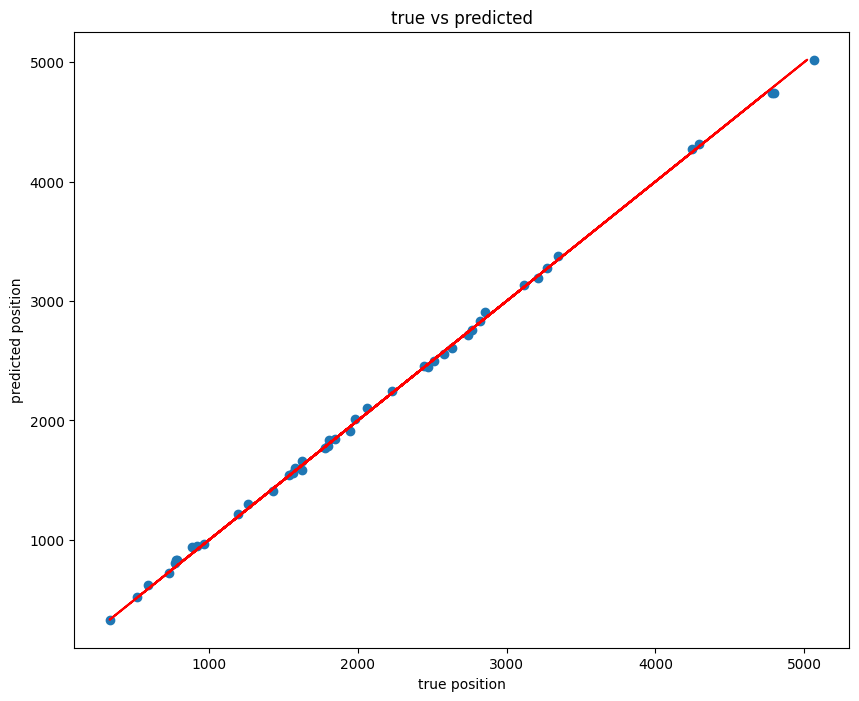

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.plot(y_pred, y_pred, color = 'red')
plt.xlabel('true position')
plt.ylabel('predicted position')
plt.title('true vs predicted')

# Quadratic regressor

In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_poly_train=poly.fit_transform(x_train)
x_poly_test=poly.fit_transform(x_test)

model=linear_model.LinearRegression()
model.fit(x_poly_train,y_train)
y_pred=model.predict(x_poly_test)

In [12]:
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y_test,y_pred,squared=False),r2_score(y_test,y_pred))

31.686538477709078 0.9988962628695442


Text(0.5, 1.0, 'true vs predicted')

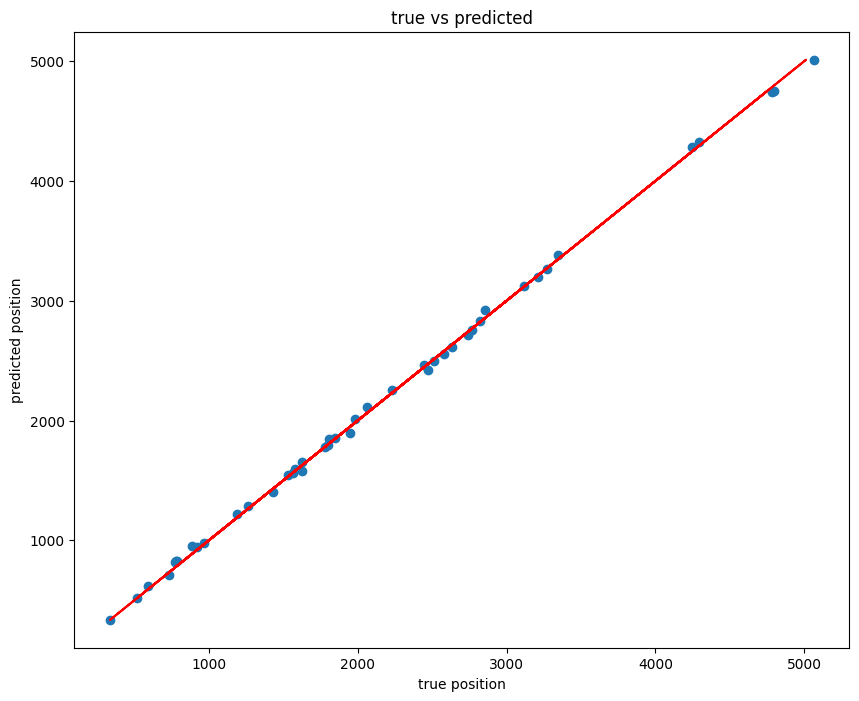

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.plot(y_pred, y_pred, color = 'red')
plt.xlabel('true position')
plt.ylabel('predicted position')
plt.title('true vs predicted')

# Cubic regressor

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
x_poly_train=poly.fit_transform(x_train)
x_poly_test=poly.fit_transform(x_test)

model=linear_model.LinearRegression()
model.fit(x_poly_train,y_train)
y_pred=model.predict(x_poly_test)

In [19]:
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y_test,y_pred,squared=False),r2_score(y_test,y_pred))

6.1410898388517845 0.9999546427799448


Text(0.5, 1.0, 'true vs predicted')

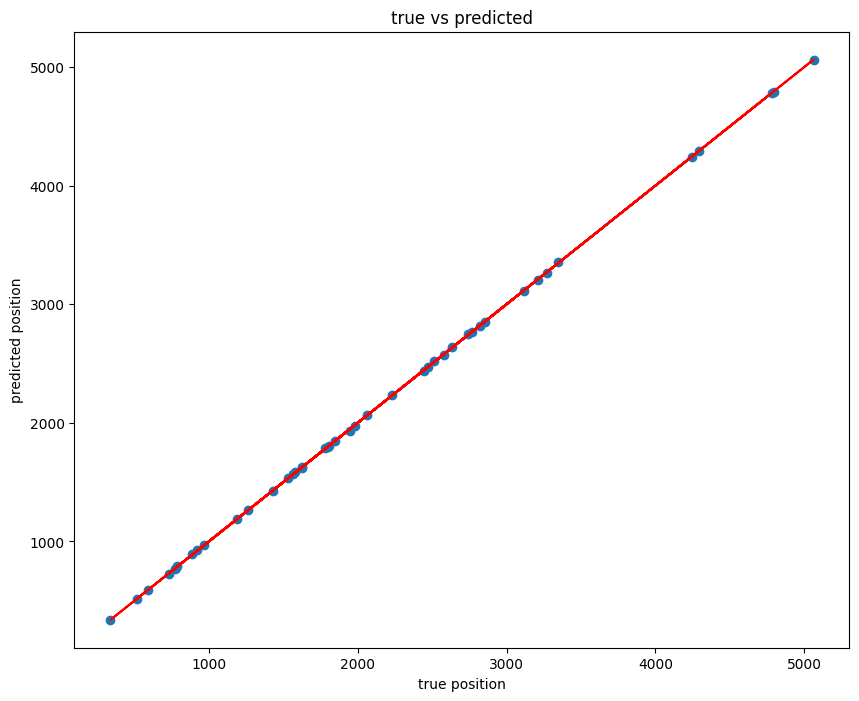

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.plot(y_pred, y_pred, color = 'red')
plt.xlabel('true position')
plt.ylabel('predicted position')
plt.title('true vs predicted')

### Test cubic regressor

In [21]:
#data from outside dataset
angle=-7.115031246911888
x0=np.array([[ 1672.0, 1861.5,  np.cos(angle*np.pi/180), np.sin(angle*np.pi/180)]])
x_poly=poly.fit_transform(x0)
y_pred=model.predict(x_poly)
y_pred
# it should be (1081.0, 1795.0)

array([[1077.81893092, 1793.06458818]])

In [31]:
df2 = pd.read_csv('./results/auto_data1/calibration_image_data.csv', sep=',',decimal='.')
df2 = df2.dropna()
df2['cos_dist']=np.cos(df2['angle_dist']*np.pi/180)
df2['sin_dist']=np.sin(df2['angle_dist']*np.pi/180)
df2['cos_undist']=np.cos(df2['angle_undist']*np.pi/180)
df2['sin_undist']=np.sin(df2['angle_undist']*np.pi/180)
df2['cos_dist_warp']=np.cos(df2['angle_dist_warp']*np.pi/180)
df2['sin_dist_warp']=np.sin(df2['angle_dist_warp']*np.pi/180)
df2['cos_undist_warp']=np.cos(df2['angle_undist_warp']*np.pi/180)
df2['sin_undist_warp']=np.sin(df2['angle_undist_warp']*np.pi/180)

x = df2[['target_x_undist', 'target_y_undist', 'cos_undist', 'sin_undist']]
y = df2[['carriage_x_undist','carriage_y_undist']]

y_true=y.values.copy()
x_poly=poly.fit_transform(x)
y_pred=model.predict(x_poly)
print(mean_squared_error(y,y_pred,squared=False),r2_score(y,y_pred))

11.495688928707407 0.9997031195223711


In [33]:
df_error=pd.DataFrame({'pred_x':y_pred[:,0],
                       'pred_y':y_pred[:,1],
                       'real_x':y_true[:,0],
                       'real_y':y_true[:,1],})
df_error['error_x']=y_pred[:,0]-y_true[:,0]
df_error['error_y']=y_pred[:,1]-y_true[:,1]
df_error['error']=np.sqrt(df_error['error_x'].values**2+df_error['error_y'].values**2)

In [34]:
mean_error=np.mean(df_error['error'])
std_error=np.std(df_error['error'])
rmse=np.sqrt(np.sum(df_error['error']**2)/df_error['error'].shape[0])
print(mean_error, rmse, std_error)

13.46487922556889 17.9435915140786 11.860417524900074
